In [1]:
import tensorflow as tf
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [3]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#input
Categories=['with_mask','without_mask']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='C:/Users/Sanje/Documents/GitHub/PRS-PM-2021-09-15-GRP-3Musketeers-DetectiveMask/data' 
#C:\Users\Sanje\Documents\GitHub\PRS-PM-2021-09-15-GRP-3Musketeers-DetectiveMask\data
#/content/drive/MyDrive/ML
#path which contains all the categories of images
for i in Categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

loading... category : with_mask
loaded category:with_mask successfully
loading... category : without_mask
loaded category:without_mask successfully


In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)

gamma1, gamma2 = 0.1, 1
C1, C2 = 1, 10
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

scaler = StandardScaler()  
scaler.fit(x_train)
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test) 

svm_clfs = []
for gamma, C in hyperparams:
    svm_clf=SVC(kernel="rbf",gamma=gamma, C=C) 
    svm_clf.fit(x_train,y_train)
    svm_clfs.append(svm_clf)




In [13]:
print (svm_clfs)

[SVC(C=1, gamma=0.1), SVC(C=10, gamma=0.1), SVC(C=1, gamma=1), SVC(C=10, gamma=1)]


In [11]:
from sklearn.metrics import classification_report, confusion_matrix  
import sklearn.metrics as metrics
for i, svm_clf in enumerate(svm_clfs):
    predictions = svm_clf.predict(x_test)  
    gamma, C = hyperparams[i]
    print("r=", gamma, "C=", C)
    print("Accuracy=", metrics.accuracy_score(y_test, predictions))
    print(confusion_matrix(y_test,predictions))  
    print(classification_report(y_test,predictions))  

r= 0.1 C= 1
Accuracy= 0.5519523494374586
[[ 68 677]
 [  0 766]]
              precision    recall  f1-score   support

           0       1.00      0.09      0.17       745
           1       0.53      1.00      0.69       766

    accuracy                           0.55      1511
   macro avg       0.77      0.55      0.43      1511
weighted avg       0.76      0.55      0.43      1511

r= 0.1 C= 10
Accuracy= 0.5519523494374586
[[ 68 677]
 [  0 766]]
              precision    recall  f1-score   support

           0       1.00      0.09      0.17       745
           1       0.53      1.00      0.69       766

    accuracy                           0.55      1511
   macro avg       0.77      0.55      0.43      1511
weighted avg       0.76      0.55      0.43      1511

r= 1 C= 1
Accuracy= 0.5506287227001986
[[ 66 679]
 [  0 766]]
              precision    recall  f1-score   support

           0       1.00      0.09      0.16       745
           1       0.53      1.00      0.69   

In [ ]:
import joblib
joblib.dump(svm_clf, 'SVM_tutorial_file_name.pkl')

import pickle
# save the model to disk
filename = 'SVM_tutorial_model.sav'
pickle.dump(svm_clf, open(filename, 'wb'))
model.save("SVM_tutorial_model.hdf5")

In [15]:
#model construction
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)


In [ ]:
#model training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

Splitted Successfully


In [17]:
#model testing
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[0 0 1 1]
The actual data is:
[0 0 1 1]
The model is 100.0% accurate


Enter URL of Image :


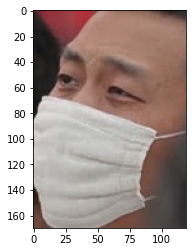

with_mask = 48.97354005779632%
without_mask = 51.02645994220369%
The predicted image is : without_mask


In [18]:
#model evaluation
url=input('Enter URL of Image :')
img=imread('C:/Users/Sanje/Documents/GitHub/PRS-PM-2021-09-15-GRP-3Musketeers-DetectiveMask/data/data/with_mask_19.jpg')
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

In [22]:
import joblib
joblib.dump(model, 'model_file_name.pkl')

['model_file_name.pkl']

In [25]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, y_test)
#print(result)

#pred = loaded_model.predict(X_test)
#print(pred)
